# 1] MISSING VALUES

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("E:\\All Datasets\\claimants sample.csv")
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,NaN,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   10 non-null     int64  
 1   CLMSEX    10 non-null     int64  
 2   CLMINSUR  8 non-null      float64
 3   SEATBELT  10 non-null     int64  
 4   CLMAGE    9 non-null      float64
 5   LOSS      9 non-null      float64
 6   ATTORNEY  10 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 688.0 bytes


In [4]:
df.describe()

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
count,10.000000,10.000000,8.000000,10.000000,9.000000,9.000000,10.000000
mean,48.900000,0.600000,0.875000,0.100000,30.222222,5.127778,0.500000
std,34.999841,0.516398,0.353553,0.316228,17.859016,11.304779,0.527046
min,3.000000,0.000000,0.000000,0.000000,5.000000,0.037000,0.000000
25%,16.500000,0.000000,1.000000,0.000000,18.000000,0.330000,0.000000
50%,53.000000,1.000000,1.000000,0.000000,31.000000,0.874000,0.500000
75%,69.000000,1.000000,1.000000,0.000000,35.000000,3.538000,1.000000
max,97.000000,1.000000,1.000000,1.000000,60.000000,34.940000,1.000000


In [5]:
df.isnull().sum()

CASENUM     0
CLMSEX      0
CLMINSUR    2
SEATBELT    0
CLMAGE      1
LOSS        1
ATTORNEY    0
dtype: int64

## Dealing the missing values

- 1) Remove the rows that contain missing values

In [6]:
df1=df.dropna()   # remove one cell empty rows
df1

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
5,97,1,1.0,0,35.0,0.309,0
8,51,1,1.0,0,60.0,0.874,1


In [7]:
df1.isnull().sum()

CASENUM     0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
ATTORNEY    0
dtype: int64

## 2)Replacing NaN values

- Mean
- Median
- Mode
- fill some values (experience about that)


-  Continuos variable--> Replace with either mean or median 
- Discrete variable ---> Replace with mode

### 1.fillna()   using pandas

In [8]:
## clmage,loss ---> condtinuous vari
## clminsur ---> discrete vari


In [9]:
mean=df["CLMAGE"].mean()
print(mean)

median=df['LOSS'].median()
print(median)

mode=df['CLMINSUR'].mode()[0]
print(mode)

30.22222222222222
0.874
1.0


In [10]:
df['CLMAGE'].fillna(mean,inplace=True)
df['CLMAGE']

0    50.000000
1    18.000000
2     5.000000
3    31.000000
4    30.000000
5    35.000000
6     9.000000
7    34.000000
8    60.000000
9    30.222222
Name: CLMAGE, dtype: float64

In [11]:
df['LOSS'].fillna(median,inplace=True)
df['LOSS']

0    34.940
1     0.891
2     0.330
3     0.037
4     0.874
5     0.309
6     3.538
7     4.881
8     0.874
9     0.350
Name: LOSS, dtype: float64

In [12]:
df['CLMINSUR'].fillna(mode,inplace=True)
df['CLMINSUR']

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: CLMINSUR, dtype: float64

In [13]:
df.isnull().sum()     # now all are filled with apropriate

CASENUM     0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
ATTORNEY    0
dtype: int64

### 2.SimpleImputer using sklearn

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
# call the func
mean_imputer=SimpleImputer(strategy='mean')

# fit_transform 
df['LOSS']=pd.DataFrame(mean_imputer.fit_transform(df[['LOSS']]))
df['LOSS']

0    34.940
1     0.891
2     0.330
3     0.037
4     0.874
5     0.309
6     3.538
7     4.881
8     0.874
9     0.350
Name: LOSS, dtype: float64

In [16]:
# call the func
median_imputer=SimpleImputer(strategy='median')

# fit_transform 
df.CLMAGE=pd.DataFrame(median_imputer.fit_transform(df[['CLMAGE']]))
df['CLMAGE']

0    50.000000
1    18.000000
2     5.000000
3    31.000000
4    30.000000
5    35.000000
6     9.000000
7    34.000000
8    60.000000
9    30.222222
Name: CLMAGE, dtype: float64

In [17]:
# now for mode
# call the func
mode_imputer=SimpleImputer(strategy='most_frequent')

# fit_transform
df.CLMINSUR=pd.DataFrame(mode_imputer.fit_transform(df[['CLMINSUR']]))
df.CLMINSUR

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: CLMINSUR, dtype: float64

In [18]:
df.isnull().sum()

CASENUM     0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
ATTORNEY    0
dtype: int64

# 2] OUTLIERS

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("E:\\All Datasets\\claimants sample.csv")
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,NaN,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


**various way to find outlier**
- 1. IQR (value<Q1-1.5*IQR    and value>Q3+1.5* IQR)
- 2. Visualization (box and hist for univarite  and scatter for bivariate)
- 3. |Z score|>2 
                    

In [21]:
Q1=df['LOSS'].quantile(0.25)
print(Q1)
Q3=df["LOSS"].quantile(0.75)
print(Q3)
IQR=Q3-Q1
IQR

0.33
3.538


3.2079999999999997

In [22]:
l_limit=Q1-(1.5*IQR)
u_limit=Q3+(1.5* IQR)
print(l_limit,u_limit)

-4.481999999999999 8.35


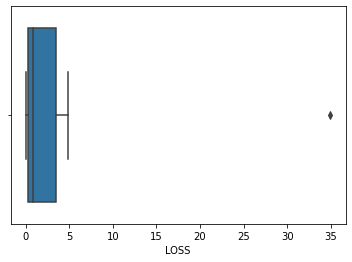

In [23]:
sns.boxplot(x=df.LOSS)
plt.show()

<AxesSubplot:>

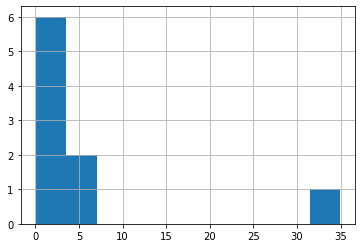

In [24]:
# from histogram we can detect
df.LOSS.hist()

<AxesSubplot:xlabel='LOSS', ylabel='Count'>

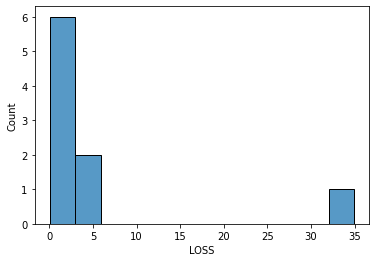

In [25]:
sns.histplot(x=df.LOSS)

**Z score**

In [26]:
mu=df.LOSS.mean()
st=df.LOSS.std()
mu,st

(5.127777777777776, 11.30477923023906)

In [27]:
df['loss_zscore']=(df['LOSS']-mu)/st   # use this type
df['loss_zscore']
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY,loss_zscore
0,5,0,1.0,0,50.0,34.940,0,2.637134
1,3,1,0.0,0,18.0,0.891,1,-0.374778
2,66,0,1.0,0,5.0,0.330,1,-0.424403
3,70,1,1.0,1,31.0,0.037,0,-0.450321
4,96,0,1.0,0,30.0,NaN,1,NaN
5,97,1,1.0,0,35.0,0.309,0,-0.426260
6,10,0,NaN,0,9.0,3.538,0,-0.140629
7,36,1,NaN,0,34.0,4.881,0,-0.021830
8,51,1,1.0,0,60.0,0.874,1,-0.376281
9,55,1,1.0,0,NaN,0.350,1,-0.422633


In [28]:
outlier=df[(df['loss_zscore']>+2)|(df['loss_zscore']<-2)]
outlier

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY,loss_zscore
0,5,0,1.0,0,50.0,34.94,0,2.637134


In [29]:
## here we drop the loss_zscore owl column
df.drop('loss_zscore',axis=1,inplace=True)

In [30]:
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,NaN,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


# Dealing the Outliers
### 1. Remove
trimming : remove outlers

In [31]:
df_trimmed=df[(df["LOSS"]>l_limit)&(df['LOSS']<u_limit)]   # this data remove outlier

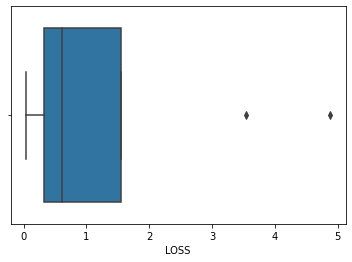

In [32]:
sns.boxplot(x=df_trimmed['LOSS'])
plt.show()
# this not best tech to deal with the outlier 
# if remove the outlier then again form a new oultlier hece this worst case


### 2. Replace with upper limit & lower limit

pip install feature _engine
**It is not applicable to the NaN values so remove that or fill**

In [33]:
df.isnull().sum()

CASENUM     0
CLMSEX      0
CLMINSUR    2
SEATBELT    0
CLMAGE      1
LOSS        1
ATTORNEY    0
dtype: int64

In [ ]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['LOSS'])

df_win=win.fit_transform(df[["LOSS"]])

In [34]:
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,NaN,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1
